In [3]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train = X_train.reshape((60000, 28*28))  # (60000, 28, 28) -> (60000, 784)
X_test = X_test.reshape((10000, 28*28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
# 0 ~ 255 갭이 크니까. 연산속도를 줄이기 위해
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

print(X_train[4])

In [6]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [8]:
from keras import models
from keras import layers

Model = models.Sequential()
Model.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
Model.add(layers.Dense(10, activation='softmax'))

In [9]:
Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
Model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [11]:
Hist = Model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2
          )

Epoch 1/100
375/375 [==============================] - 4s 3ms/step - loss: 0.4588 - accuracy: 0.8691 - val_loss: 0.1479 - val_accuracy: 0.9584
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1251 - accuracy: 0.9639 - val_loss: 0.1083 - val_accuracy: 0.9682
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0788 - accuracy: 0.9775 - val_loss: 0.1002 - val_accuracy: 0.9706
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0530 - accuracy: 0.9847 - val_loss: 0.0827 - val_accuracy: 0.9762
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0397 - accuracy: 0.9882 - val_loss: 0.0853 - val_accuracy: 0.9762
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0305 - accuracy: 0.9914 - val_loss: 0.0880 - val_accuracy: 0.9762
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0211 - accuracy: 0.9936 - val_loss: 0.0798 - val_accuracy: 0.9771

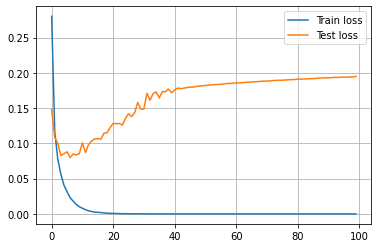

In [13]:
import matplotlib.pyplot as plt

plt.plot(Hist.history['loss'])
plt.plot(Hist.history['val_loss'])
plt.legend(['Train loss','Test loss'])
plt.grid()
plt.show()

In [14]:
loss, accuracy = Model.evaluate(X_test, y_test)
print(loss, accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1621 - accuracy: 0.9824
0.1620643585920334 0.9824000000953674
